In [1]:
from fit import *
import matplotlib.pyplot as plt
%matplotlib widget
from utils import plot_event, plot_generator, get_data_files, preceding_noise_file

In [2]:
data_date_and_time = '20190504034237'
data_files = get_data_files(data_date_and_time)
noise_files = [preceding_noise_file(f) for f in data_files]
cfg = CounterConfig(data_files, noise_files)

In [3]:
corsika_file = '/home/isaac/NIZ/he_corsika/iact_DAT000004.dat'
pe = ProcessEvents(cfg, frozen_noise=True)
real_nfits = pe.gen_nfits_from_ei(corsika_file)

In [4]:
real_nfits

[b'20240415164409'_000013d7,
 b'20240415164409'_000013cd,
 b'20240415164409'_000013dc,
 b'20240415164409'_00001408,
 b'20240415164409'_000013ea,
 b'20240415164409'_000013c7,
 b'20240415164409'_000013f6,
 b'20240415164409'_00001416,
 b'20240415164409'_000013f0,
 b'20240415164409'_000013c3,
 b'20240415164409'_00001400,
 b'20240415164409'_000013e3]

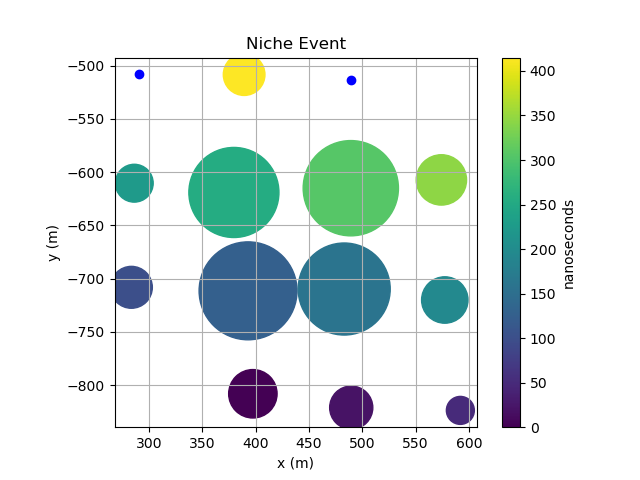

In [5]:
ty = tyro(real_nfits)
pf = NichePlane(real_nfits)
plot_event(ty)

In [6]:
import CHASM as ch
ei = ch.EventioWrapper(corsika_file)
print(ei.X[ei.nch.argmax()])
print(ei.nch.max())
print(ei.theta)

613.0
10620761.0
0.4464552


In [7]:
guess = make_guess(ty, pf,cfg)
[print(p) for p in guess];

FitParam(name='xmax', value=500.0, limits=(400.0, 800.0), error=50.0, fixed=False)
FitParam(name='nmax', value=1000000.0, limits=(10000.0, 100000000.0), error=100000.0, fixed=False)
FitParam(name='zenith', value=0.4622138652625374, limits=(0.0, 0.5622138652625374), error=0.017453292519943295, fixed=False)
FitParam(name='azimuth', value=4.455198751728338, limits=(4.355198751728338, 4.555198751728337), error=0.017453292519943295, fixed=False)
FitParam(name='corex', value=436.2329592834091, limits=(379.5, 489.2), error=5.0, fixed=False)
FitParam(name='corey', value=-664.955651540472, limits=(-711.4, -615.1), error=5.0, fixed=False)
FitParam(name='corez', value=-29.0, limits=(-29.0, -29.0), error=1.0, fixed=True)
FitParam(name='x0', value=0.0, limits=(0, 0), error=1, fixed=True)
FitParam(name='lambda', value=70.0, limits=(60.0, 80.0), error=1, fixed=True)
FitParam(name='t_offset', value=0.0, limits=(-450.0, 450.0), error=10.0, fixed=False)


In [8]:
guess = BasicParams.adjust_guess(guess)

In [9]:
pt = PeakTimes(real_nfits, BasicParams, cfg)
pt.target_parameters = ['zenith','azimuth']
m = init_minuit(pt, guess)
m.simplex(ncall=40)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 368.4 (χ²/ndof = 36.8)     │              Nfcn = 41               │
│ EDM = 0.745 (Goal: 0.1)          │           time = 12.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    500    │    50     │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │   1.0e6   │   0.1e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │ 445.81e-3 │  0.05e-3  │            │            │    0    │0.562214 │       │
│ 3 │ azimuth  │  4.46484  │  0.00017  │            │            │ 4.3552  │ 4.5552  │       │
│ 4 │ corex    │    436    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -665    │     5     │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [10]:
tpguess = update_guess(m)
pw = PulseWidth(real_nfits, BasicParams, cfg)
pw.target_parameters = ['xmax']
m = init_minuit(pw, tpguess)
m.simplex(ncall=40)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 205.5 (χ²/ndof = 18.7)     │              Nfcn = 11               │
│ EDM = 0.0764 (Goal: 0.1)         │            time = 4.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │  0.40e3   │  0.27e3   │            │            │   400   │   800   │       │
│ 1 │ nmax     │   1.0e6   │   0.1e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │ 445.81e-3 │  0.05e-3  │            │            │    0    │0.562214 │  yes  │
│ 3 │ azimuth  │  4.46484  │  0.00017  │            │            │ 4.3552  │ 4.5552  │  yes  │
│ 4 │ corex    │    436    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -665    │     5     │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [11]:
xmaxguess = update_guess(m)
pa = PulseArea(real_nfits, BasicParams, cfg)
pa.target_parameters = ['nmax']
m = init_minuit(pa, xmaxguess)
m.simplex(ncall=20)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4491 (χ²/ndof = 408.3)     │              Nfcn = 21               │
│ EDM = 6.45 (Goal: 0.1)           │            time = 9.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │  0.40e3   │  0.27e3   │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │  12.93e6  │  0.27e6   │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │ 445.81e-3 │  0.05e-3  │            │            │    0    │0.562214 │  yes  │
│ 3 │ azimuth  │  4.46484  │  0.00017  │            │            │ 4.3552  │ 4.5552  │  yes  │
│ 4 │ corex    │    436    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -665    │     5     │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [12]:
nmaxguess = update_guess(m)
pa = NormalizedPulseArea(real_nfits, BasicParams, cfg)
pa.target_parameters = ['xmax','nmax','corex','corey']
m = init_minuit(pa, nmaxguess)
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 99.74 (χ²/ndof = 12.5)     │              Nfcn = 184              │
│ EDM = 0.0417 (Goal: 0.1)         │           time = 71.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    689    │     6     │            │            │   400   │   800   │       │
│ 1 │ nmax     │  8.12e6   │  0.11e6   │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │ 445.81e-3 │  0.05e-3  │            │            │    0    │0.562214 │  yes  │
│ 3 │ azimuth  │  4.46484  │  0.00017  │            │            │ 4.3552  │ 4.5552  │  yes  │
│ 4 │ corex    │   438.6   │    0.6    │            │            │  379.5  │  489.2  │       │
│ 5 │ corey    │  -659.4   │    0.5    │            │            │ -711.4  │ -615.1  │       │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [13]:
guess = update_guess(m)
at = AllTunka(real_nfits, BasicParams, cfg)
at.target_parameters = ['t_offset']
m = init_minuit(at, guess)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.15e+04 (χ²/ndof = 882.9) │              Nfcn = 142              │
│ EDM = 8.22e+10 (Goal: 0.0002)    │           time = 50.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    689    │     6     │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │  8.12e6   │  0.11e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │ 445.81e-3 │  0.05e-3  │            │            │    0    │0.562214 │  yes  │
│ 3 │ azimuth  │  4.46484  │  0.00017  │            │            │ 4.3552  │ 4.5552  │  yes  │
│ 4 │ corex    │   438.6   │    0.6    │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │  -659.4   │    0.5    │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │   0.1e3   │   0.7e3   │            │            │  -450   │   450   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│          │     xmax     nmax   zenith  azimuth    corex    corey    corez       x0   lambda t_offset │
├──────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│     xmax │        0        0        0        0        0        0        0        0        0        0 │
│     nmax │        0        0        0        0        0        0        0        0        0        0 │
│   zenith │        0        0        0        0        0        0        0        0        0        0 │
│  azimuth │        0        0        0        0        0        0        0        0        0        0 │
│    corex │        0        0        0        0        0        0        0        0        0        0 │
│    corey │        0        0        0        0        0        0        0        0        0        0 │
│    corez │        0        0        0        0        0        0        0        0        0        0 │
│       x0 │        0        0        0        0        0        0        0        0        0        0 │
│   lambda │        0        0        0        0        0        0        0        0        0        0 │
│ t_offset │        0        0        0        0        0        0        0        0        0 3.98e+05 │
└──────────┴───────────────────────────────────────────────────────────────────────────────────────────┘

In [14]:
guess = update_guess(m)
at = AllSamples(real_nfits, BasicParams, cfg)
at.target_parameters = ['t_offset']
m = init_minuit(at, guess)


In [15]:
m.tol=.01
m.fixed = True
m.fixed['xmax'] = False
m.fixed['nmax'] = False
m.fixed['zenith'] = False
m.fixed['azimuth'] = False
m.fixed['corex'] = False
m.fixed['corey'] = False
# m.fixed['t_offset'] = False
# m.scan()
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.889e+04 (χ²/ndof = 190.8)│              Nfcn = 224              │
│ EDM = 15 (Goal: 0.01)            │           time = 67.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │   607.9   │    0.6    │            │            │   400   │   800   │       │
│ 1 │ nmax     │  9.835e6  │  0.017e6  │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │447.115e-3 │ 0.008e-3  │            │            │    0    │0.562214 │       │
│ 3 │ azimuth  │ 4.463162  │ 0.000010  │            │            │ 4.3552  │ 4.5552  │       │
│ 4 │ corex    │  438.36   │   0.06    │            │            │  379.5  │  489.2  │       │
│ 5 │ corey    │ -657.914  │   0.016   │            │            │ -711.4  │ -615.1  │       │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │   0.1e3   │   0.7e3   │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [16]:
m.tol=.01
m.fixed = True
m.fixed['xmax'] = False
m.fixed['nmax'] = False
m.fixed['lambda'] = False
# m.scan()
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.879e+04 (χ²/ndof = 184.2)│              Nfcn = 308              │
│ EDM = 0.0983 (Goal: 0.01)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │  605.70   │   0.04    │            │            │   400   │   800   │       │
│ 1 │ nmax     │ 10.132e6  │  0.034e6  │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │447.115e-3 │ 0.008e-3  │            │            │    0    │0.562214 │  yes  │
│ 3 │ azimuth  │ 4.463162  │ 0.000010  │            │            │ 4.3552  │ 4.5552  │  yes  │
│ 4 │ corex    │  438.36   │   0.06    │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │ -657.914  │   0.016   │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │   63.2    │    0.5    │            │            │   60    │   80    │       │
│ 9 │ t_offset │   0.1e3   │   0.7e3   │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [17]:
import CHASM as ch
ei = ch.EventioWrapper(corsika_file)
print(ei.X[ei.nch.argmax()])
print(ei.nch.max())
print(ei.theta)

613.0
10620761.0
0.4464552


In [18]:
fitpars = [p.value for p in m.params]
fit_ev = BasicParams.get_event(fitpars)
print(fit_ev)

Event(E=7793812499925487.0, Xmax=605.6959055382849, Nmax=10131956.249903133, zenith=0.4471149530004897, azimuth=4.463162450367198, corex=438.36127815676673, corey=-657.9137684841925, corez=-29.0, X0=0.0, Lambda=63.212055572637304)


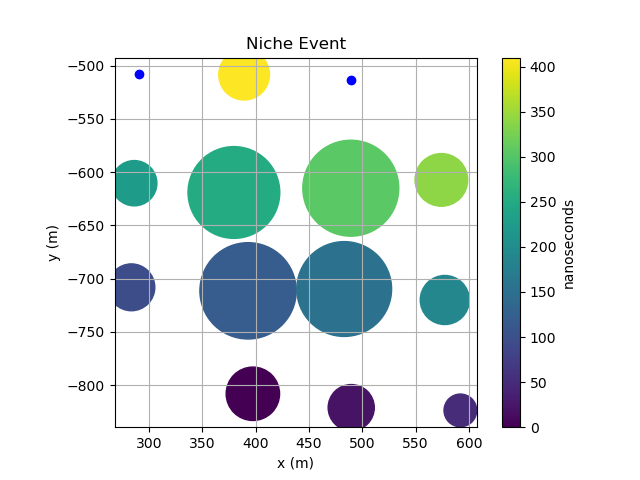

In [19]:
fit_nfits = pe.gen_nfits_from_event(fit_ev)
plot_event(tyro(fit_nfits))

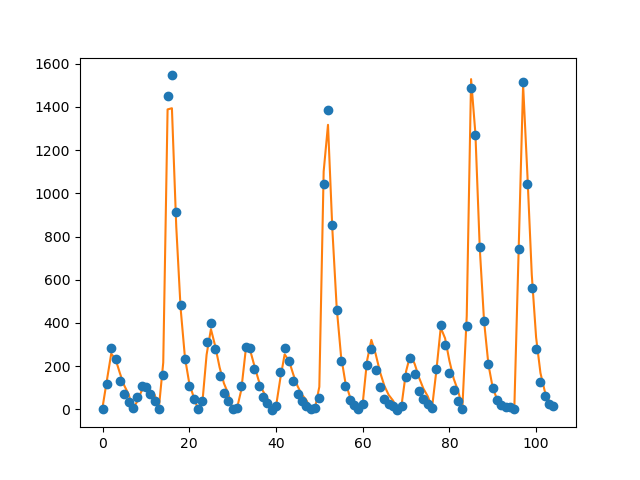

In [20]:
plt.figure()
fitpars = [p.value for p in m.params]
plt.errorbar(np.arange(len(at.real_values)),at.real_values,yerr=at.error, fmt="o")
plt.plot(at.get_output(fitpars))

In [21]:
at.chi2(fitpars)/m.ndof

184.20466308218556

In [22]:
at.get_output(fitpars)

array([9.02771807e+00, 1.33934362e+02, 2.57448860e+02, 2.32289707e+02,
       1.67374891e+02, 1.10415220e+02, 6.99182772e+01, 3.36179613e+00,
       3.64601932e+01, 8.53137893e+01, 9.91582491e+01, 8.67895849e+01,
       6.74058973e+01, 8.23167474e+00, 2.16630031e+02, 1.38867842e+03,
       1.39408373e+03, 8.46284778e+02, 4.69291982e+02, 2.40531592e+02,
       1.20437250e+02, 5.79088456e+01, 1.70457935e+00, 2.57614286e+01,
       2.53075433e+02, 3.71051940e+02, 2.91513864e+02, 1.94050127e+02,
       1.20117234e+02, 7.21608119e+01, 7.24802586e-01, 3.20647766e+00,
       8.99815016e+01, 2.70440332e+02, 2.77026644e+02, 2.03004170e+02,
       1.34041896e+02, 8.42172803e+01, 5.19397205e+01, 1.10587041e+00,
       1.19484361e+01, 1.42478606e+02, 2.54394516e+02, 2.25181966e+02,
       1.61230520e+02, 1.06425386e+02, 6.77145377e+01, 4.25620011e+01,
       2.10072602e+00, 5.53820861e+00, 1.04024823e+02, 1.10150540e+03,
       1.31725419e+03, 8.35082920e+02, 4.72333625e+02, 2.47782247e+02,
      

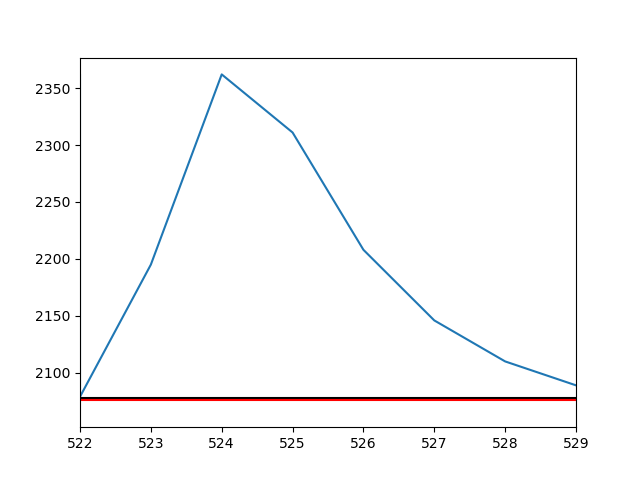

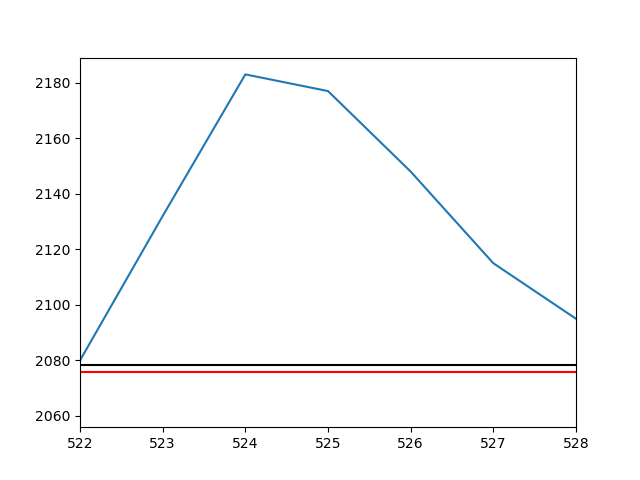

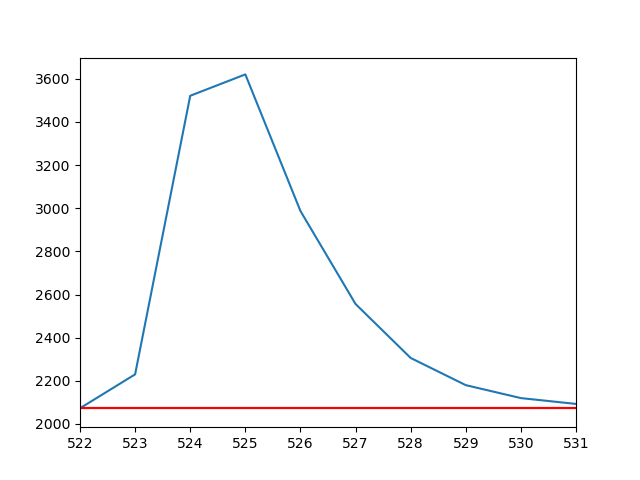

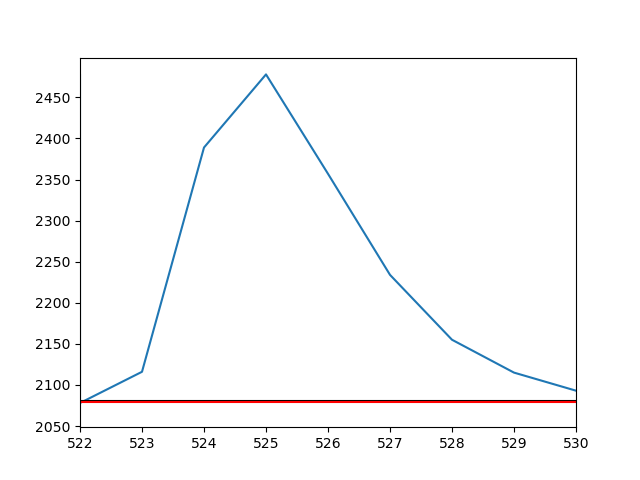

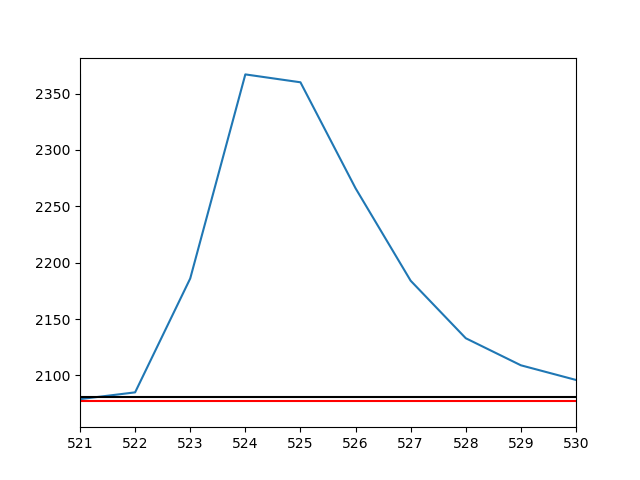

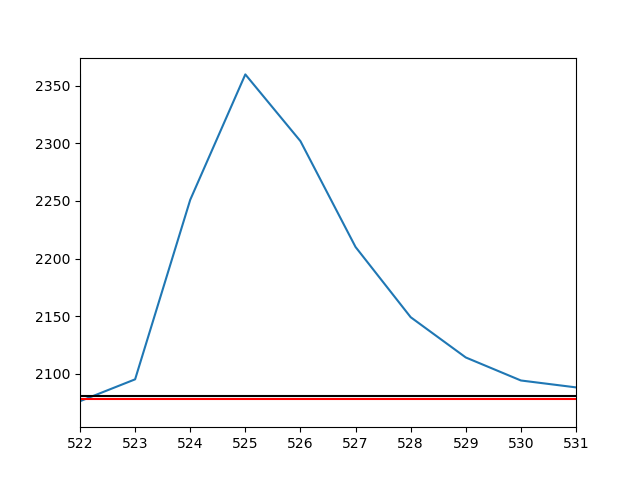

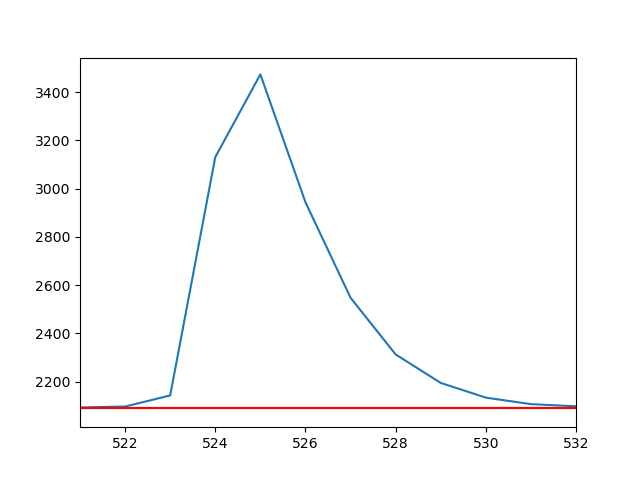

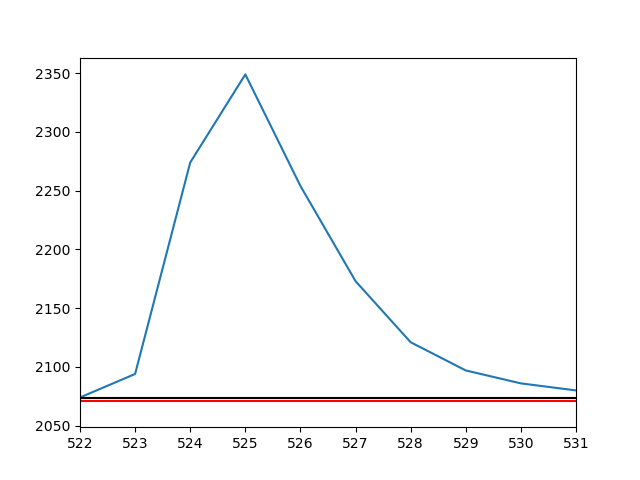

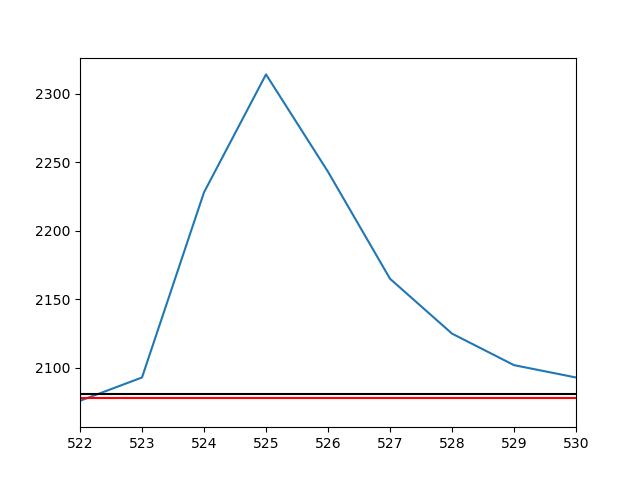

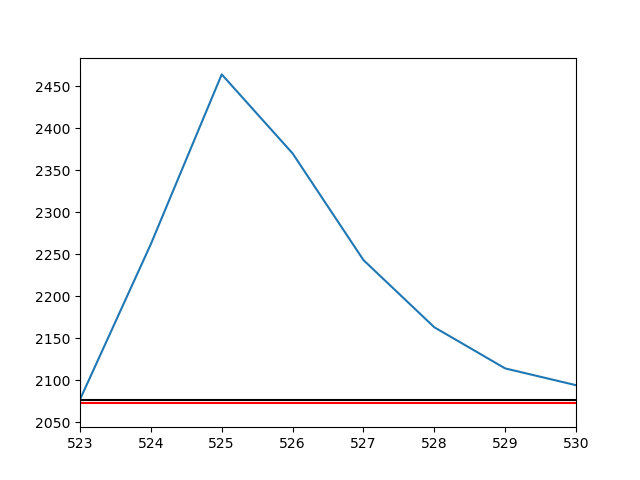

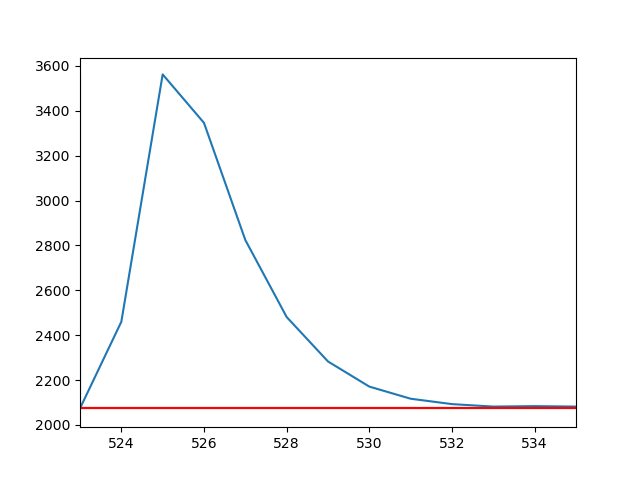

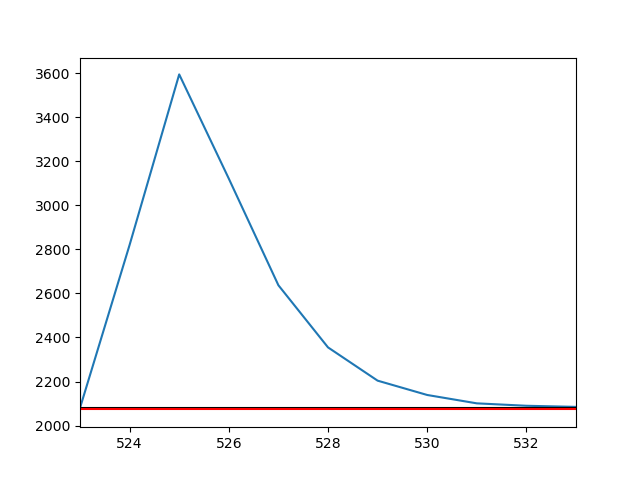

In [23]:
for f in at.nfits:
    plt.figure()
    plt.plot(f.waveform)
    plt.hlines(f.baseline + f.baseline_error,0,1040, color='k')
    plt.hlines(f.baseline,0,1040, color='r')
    plt.vlines(f.start_rise, f.baseline,f.waveform.max())
    plt.xlim(f.start_rise,f.end_fall)
